In [1]:
##
## Keith Loritz: 2023AUG11
##
## This was my starting point for the 2023 Hackathon
## I utilized this notebook to get familiar with the environment
## It is mostly the same as what Todd had provided with addition of other code also provided by Todd
## 
## I saved this as my base reference for starting point and 
## Started working with the "Todd-base-2023AUG09.ipynb" notebook instead.
##
##
## The line below is not needed, already part of our environment
##pip install biopython

In [2]:
import os
import sys

In [3]:
sys.executable

'/opt/jupyterhub/bin/python3'

In [4]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
import Bio
import os, json, argparse, string, subprocess, re

In [ ]:
df = pd.read_csv("../igblast_data/SRR4431764merged.igblast",sep='\t')

In [6]:
print(df)

                sequence_id  \
0             SRR4431764.46   
1             SRR4431764.59   
2             SRR4431764.67   
3             SRR4431764.70   
4             SRR4431764.73   
...                     ...   
1143805  SRR4431764.1701094   
1143806  SRR4431764.1701099   
1143807  SRR4431764.1701102   
1143808  SRR4431764.1701104   
1143809  SRR4431764.1701105   

                                                  sequence  \
0        GGGGAAGAGGAAGCGTCGATCTACGGGATTCAAGAGACACGTTGTA...   
1        TGGATAACATATCACATTCTACGGGGAGTCAGTCCCAACCAGGACA...   
2        TCTTCTAAACATTCACGGATCTACGGGGAGGGCCAGTGCTGGGGTC...   
3        GACACTTTAATATATCATCTACGGGCCTAAGCTCCTGATCTACGAT...   
4        TTAGGAATCCTTCTTTCATACGGGAGTGGTAGTGGTGGTAGCACAT...   
...                                                    ...   
1143805  GACCCTTTTATAGGCTACAATACGGGGAGGATGCCGCGTCTGTGAA...   
1143806  TCATCTAATGGTCACAATGAGTTGATCTACGGGAGGCTCTGCTTCA...   
1143807  GGTAAATACTATATCATCGATACGGGGACTGCTCAGTTAGGACCCA...   
1143808

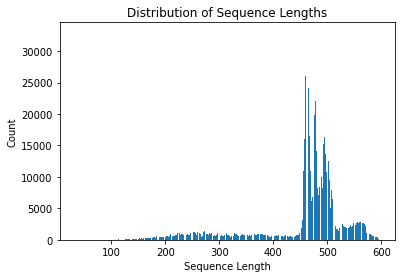

In [7]:
# add a new column with the length of the sequences 
df['seq_len'] = df['sequence'].apply(len)
seq_len_counts = df['seq_len'].value_counts()

#print(df[['sequence', 'seq_len']])
#print(seq_len_counts)

seq_len_counts = seq_len_counts.sort_index()

# Plot the distribution of sequence lengths
import matplotlib.pyplot as plt
plt.bar(seq_len_counts.index, seq_len_counts.values)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.show()
plt.close()

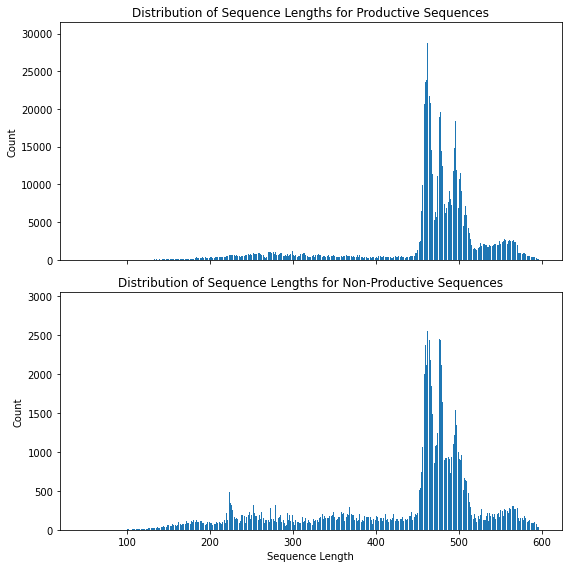

In [8]:
df['seq_len'] = df['sequence'].apply(len)

# Filter the data where 'productive' is 'T'
productive_df = df[df['productive'] == 'T']

# Filter the data where 'productive' is 'F'
non_productive_df = df[df['productive'] == 'F']

# Count the occurrences of each sequence length for productive and non-productive sequences
productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

# Create a 2x1 subplot layout
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Plot the distribution of sequence lengths for productive sequences
axes[0].bar(productive_seq_len_counts.index, productive_seq_len_counts.values)
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Sequence Lengths for Productive Sequences')

# Plot the distribution of sequence lengths for non-productive sequences
axes[1].bar(non_productive_seq_len_counts.index, non_productive_seq_len_counts.values)
axes[1].set_xlabel('Sequence Length')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Sequence Lengths for Non-Productive Sequences')

plt.tight_layout()
plt.show()
plt.close()

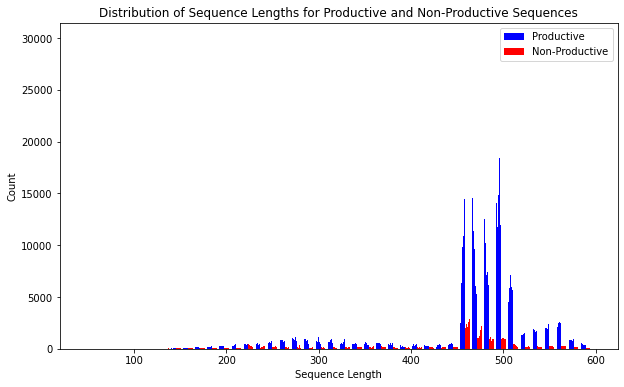

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with columns 'sequence', 'productive', and 'seq_len'

# Create a new column 'seq_len' that contains the length of each sequence
df['seq_len'] = df['sequence'].apply(len)

# Filter the data where 'productive' is 'T'
productive_df = df[df['productive'] == 'T']

# Filter the data where 'productive' is 'F'
non_productive_df = df[df['productive'] == 'F']

# Count the occurrences of each sequence length for productive and non-productive sequences
productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

# Create a single plot with two bars side by side
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of sequence lengths for productive sequences (in blue)
ax.bar(productive_seq_len_counts.index - 0.2, productive_seq_len_counts.values, width=0.4, color='blue', label='Productive')

# Plot the distribution of sequence lengths for non-productive sequences (in red)
ax.bar(non_productive_seq_len_counts.index + 0.2, non_productive_seq_len_counts.values, width=0.4, color='red', label='Non-Productive')

ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sequence Lengths for Productive and Non-Productive Sequences')
ax.legend()

plt.show()
plt.close()

In [10]:
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

prod_df=df[df['productive'] == 'T'] #global filter

for column in columns_to_count:
    counts = prod_df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(counts)
    print(f"Total: '{prod_df.shape[0]}'")
    print("-----------------------")

Value counts for column 'fwr1_aa':
fwr1_aa
DIQMTQSPSSLSASVGDRVTITCRAS    51043
QSALTQPASVSGSPGQSITISCTGT     42758
EIVLTQSPGTLSLSPGERATLSCRAS    29642
DIVMTQSPDSLAVSLGERATINCKSS    28928
EIVLTQSPATLSLSPGERATLSCRAS    25195
                              ...  
QLVLTPSPSASASLGASVKLTCTLN         1
EVHLLESGGGLVQPGGSLRLSCVAA         1
DIPMTQSPSSLSAFVGDRVTITFRAN        1
VVLTQSPVSLAVALGQSVSISCRSA         1
EVQLLESGGGFVKPGGSLRLSCAAP         1
Name: count, Length: 67284, dtype: int64
Total: '963708'
-----------------------
Value counts for column 'cdr1_aa':
cdr1_aa
SSDVGGYNY       34714
QSISSY          30443
QSVSSSY         25673
QSVSSN          24718
QSVSSY          23637
                ...  
KGISSG              1
QNINMR              1
QSGWASSNNKNY        1
SCDLCGFNY           1
GFXFSTXW            1
Name: count, Length: 37124, dtype: int64
Total: '963708'
-----------------------
Value counts for column 'fwr2_aa':
fwr2_aa
LAWYQQKPGQAPRLLIY    87592
LNWYQQKPGKAPKLLIY    43307
VSWYQQHPGKAPKLMIY

In [11]:
import seaborn as sns
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

df[df['productive'] == 'T']

for column in columns_to_count:
    # Calculate the value counts for the column
    counts = df[column].value_counts()
    # Filter the value counts for values greater than 1
    filtered_counts = counts[counts > 10]
    diversity = filtered_counts.shape[0]
    
    print(f"Filtered value counts for column '{column}':")
    print(diversity)
    print("-----------------------")

Filtered value counts for column 'fwr1_aa':
7338
-----------------------
Filtered value counts for column 'cdr1_aa':
8073
-----------------------
Filtered value counts for column 'fwr2_aa':
7702
-----------------------
Filtered value counts for column 'cdr2_aa':
3782
-----------------------
Filtered value counts for column 'fwr3_aa':
11646
-----------------------
Filtered value counts for column 'fwr4_aa':
2070
-----------------------
Filtered value counts for column 'cdr3_aa':
15276
-----------------------


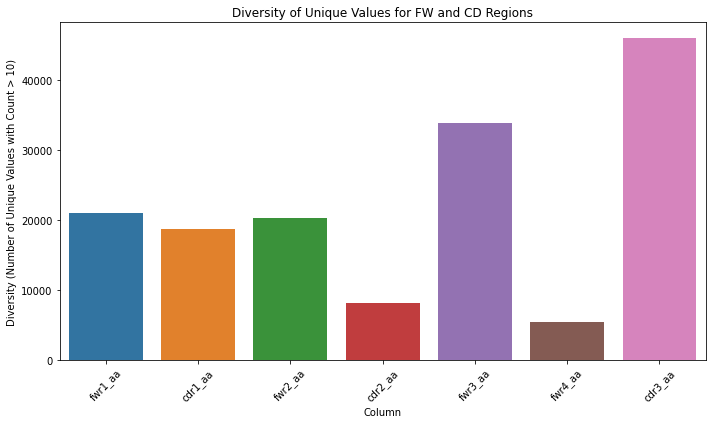

In [12]:
# Assuming 'df' is your pandas DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'

columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Initialize lists to store the column names and their respective diversities
column_names = []
diversities = []

for column in columns_to_count:
    # Calculate the value counts for the column
    counts = df[column].value_counts()
    # Filter the value counts for values greater than 10
    filtered_counts = counts[counts > 1]
    # Calculate the diversity (number of unique values with count > 10)
    diversity = filtered_counts.shape[0]
    
    # Append column name and diversity to the lists
    column_names.append(column)
    diversities.append(diversity)

# Create the bar plot for column names and their diversities
plt.figure(figsize=(10, 6))
sns.barplot(x=column_names, y=diversities)
plt.xlabel('Column')
plt.ylabel('Diversity (Number of Unique Values with Count > 10)')
plt.title('Diversity of Unique Values for FW and CD Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

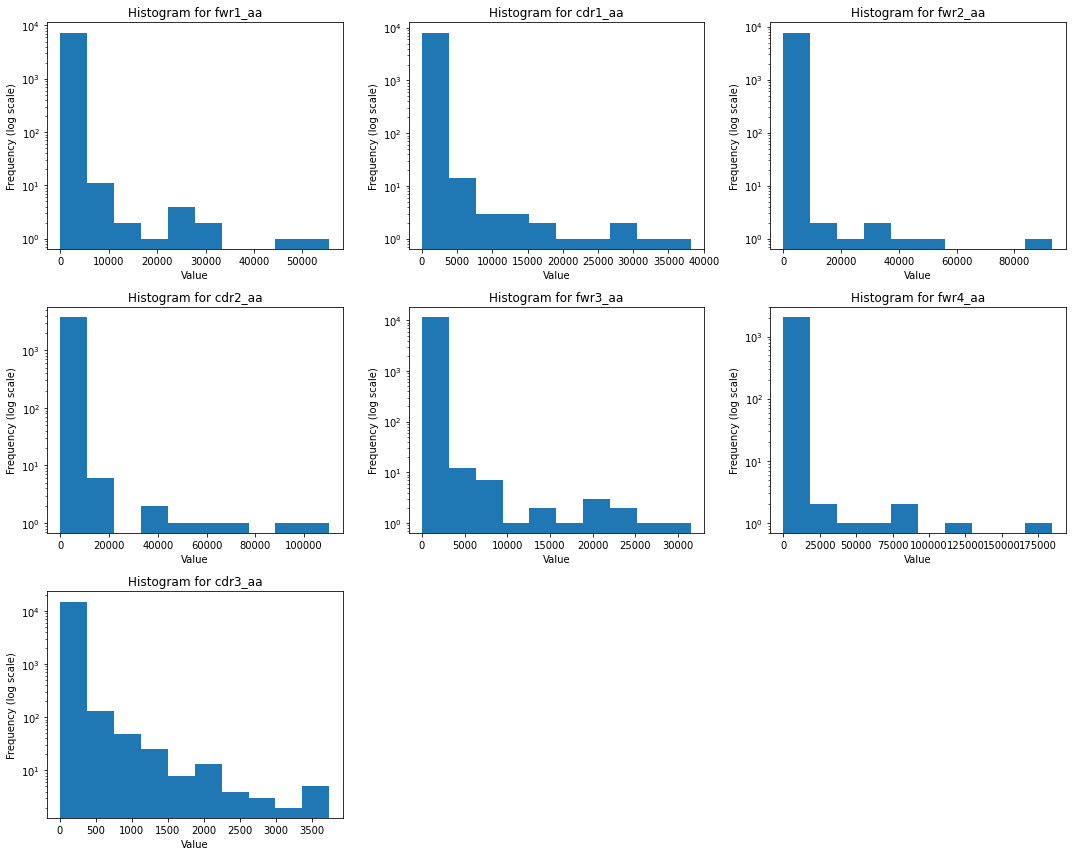

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your pandas DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'

columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Initialize lists to store the column names and their respective diversities
column_names = []
diversities = []

# Precompute the histogram data for each column
hist_data = {}
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = df[column].value_counts()
    # Filter the value counts for values greater than 1
    filtered_counts = counts[counts > 10]
    # Calculate the diversity (number of unique values with count > 1)
    diversity = filtered_counts.shape[0]
    
    # Append column name and diversity to the lists
    column_names.append(column)
    diversities.append(diversity)

    # Precompute the histogram data using value_counts() and store it in hist_data dictionary
    hist_data[column] = filtered_counts.values

# Get the common ymax value (maximum value across all histograms)
all_values = [value for column_values in hist_data.values() for value in column_values]
ymax = max(all_values)

# Plot histograms for each column with 10 bins on log scale with the common ymax
num_rows = len(columns_to_count) // 3 + 1
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_count):
    plt.subplot(num_rows, 3, i + 1)
    values = hist_data[column]
    plt.hist(values, bins=10)
    plt.yscale('log')  # Set y-axis to log scale
    plt.xlabel('Value')
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Histogram for {column}')
    #plt.ylim(0.1, ymax * 10)  # Set the common ymax value for all subplots
    
plt.tight_layout()
plt.show()

In [14]:
# Assuming 'prod_df' is your filtered DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Calculate the total number of rows in the DataFrame
total_rows = prod_df.shape[0]

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = prod_df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    # Print the table for the current column
    print(f"Table for column '{column}':")
    print(result_df)
    print("-----------------------")

Table for column 'fwr1_aa':
                         sequence  number      frac
0      DIQMTQSPSSLSASVGDRVTITCRAS   51043  0.052965
1       QSALTQPASVSGSPGQSITISCTGT   42758  0.044368
2      EIVLTQSPGTLSLSPGERATLSCRAS   29642  0.030758
3      DIVMTQSPDSLAVSLGERATINCKSS   28928  0.030017
4      EIVLTQSPATLSLSPGERATLSCRAS   25195  0.026144
...                           ...     ...       ...
67279   QLVLTPSPSASASLGASVKLTCTLN       1  0.000001
67280   EVHLLESGGGLVQPGGSLRLSCVAA       1  0.000001
67281  DIPMTQSPSSLSAFVGDRVTITFRAN       1  0.000001
67282   VVLTQSPVSLAVALGQSVSISCRSA       1  0.000001
67283   EVQLLESGGGFVKPGGSLRLSCAAP       1  0.000001

[67284 rows x 3 columns]
-----------------------
Table for column 'cdr1_aa':
           sequence  number      frac
0         SSDVGGYNY   34714  0.036021
1            QSISSY   30443  0.031589
2           QSVSSSY   25673  0.026640
3            QSVSSN   24718  0.025649
4            QSVSSY   23637  0.024527
...             ...     ...       ...
3711

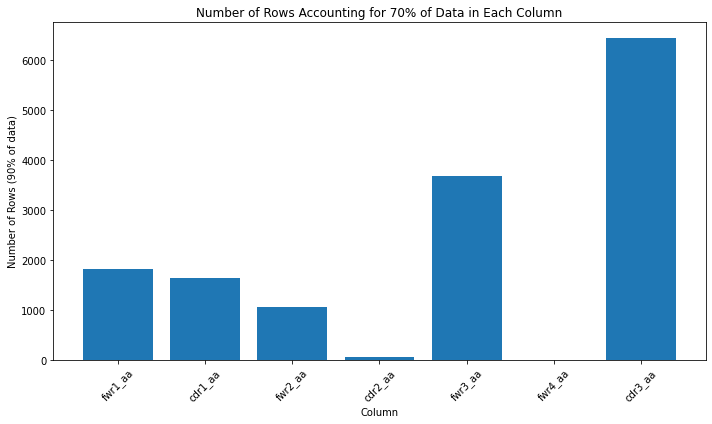

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'prod_df' is your filtered DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Calculate the total number of rows in the DataFrame
total_rows = prod_df.shape[0]

# Set the filter threshold for cumulative sum of 'frac'
filter_threshold = 0.7

# Initialize a list to store the counts of rows where sum of 'frac' >= 0.9
rows_90percent = []

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = prod_df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    
    # Calculate the cumulative sum of 'frac'
    cumsum = result_df['frac'].cumsum()
    
    # Filter the rows where the cumulative sum is less than or equal to the filter threshold
    filtered_rows = result_df[cumsum <= filter_threshold]
    
    # Count the number of rows that satisfy the condition
    rows_90 = filtered_rows.shape[0]
    rows_90percent.append(rows_90)

# Create a bar plot for the count of rows that account for 90% of data in each column
plt.figure(figsize=(10, 6))
plt.bar(columns_to_count, rows_90percent)
plt.xlabel('Column')
plt.ylabel('Number of Rows (90% of data)')
plt.title(f'Number of Rows Accounting for {int(filter_threshold*100)}% of Data in Each Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


fwr1_aa
total_rows 67284
filtered_rows 560

cdr1_aa
total_rows 37124
filtered_rows 655

fwr2_aa
total_rows 48907
filtered_rows 366

cdr2_aa
total_rows 11703
filtered_rows 26

fwr3_aa
total_rows 107167
filtered_rows 1677

fwr4_aa
total_rows 8461
filtered_rows 6

cdr3_aa
total_rows 91044
filtered_rows 3748



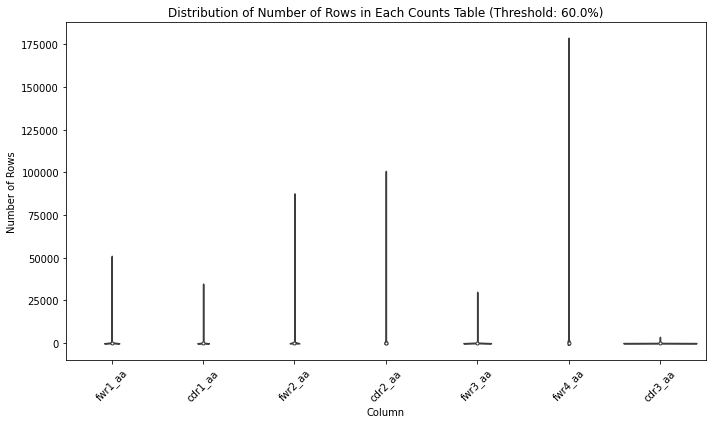

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'prod_df' is your filtered DataFrame containing the columns 'fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', and 'cdr3_aa'
columns_to_count = ['fwr1_aa', 'cdr1_aa', 'fwr2_aa', 'cdr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr3_aa']

# Calculate the total number of rows in the DataFrame
total_rows = prod_df.shape[0]

# Set the filter threshold (fraction sum)
filter_threshold = 0.6

# Initialize a list to store the counts of rows where sum of 'frac' >= filter_threshold
rows_filter_percent = []

# Initialize a list to store the violin plot data
violin_data_list = []

# Loop through each column and calculate value counts and fractions
for column in columns_to_count:
    # Calculate the value counts for the column
    counts = prod_df[column].value_counts()
    # Calculate the fraction (percentage) of each value in the column
    frac = counts / total_rows
    # Combine the counts and fractions into a DataFrame
    result_df = pd.DataFrame({'sequence': counts.index, 'number': counts.values, 'frac': frac.values})
    
    # Calculate the cumulative sum of 'frac'
    cumsum = result_df['frac'].cumsum()
    
    # Filter the rows where the cumulative sum is less than or equal to the filter_threshold
    filtered_rows = result_df[cumsum <= filter_threshold]
    
    # Count the number of rows that satisfy the condition
    rows_filtered = len(filtered_rows)
    rows_filter_percent.append(rows_filtered)

    # Append the 'number' values to the violin data list
    violin_data_list.append(counts)
    print(column)
    print(f"total_rows {counts.shape[0]}")
    print(f"filtered_rows {rows_filtered}\n")
    

# Create the violin plot for 'number' values
plt.figure(figsize=(10, 6))
sns.violinplot(data=violin_data_list)
plt.xlabel('Column')
plt.ylabel('Number of Rows')
plt.title(f'Distribution of Number of Rows in Each Counts Table (Threshold: {filter_threshold * 100}%)')
plt.xticks(ticks=range(len(columns_to_count)), labels=columns_to_count, rotation=45)
plt.tight_layout()
plt.show()


In [17]:
import os

cmd = 'igblastn \
    -germline_db_V /usr/local/igblast/database/IGV \
    -germline_db_D /usr/local/igblast/database/IGHD \
    -germline_db_J /usr/local/igblast/database/IGJ \
    -auxiliary_data optional_file/human_gl.aux \
    -query SRR4431764merged.fa \
    -outfmt 19 \
    -num_threads 64 \
    -out BLAST_RESULTS'
##os.system(cmd)

In [ ]:
import os

cmd = "igblastn -help"
os.system(cmd)

In [19]:
!locate optional_file/human_gl.aux

/usr/bin/bash: line 1: locate: command not found


In [20]:
!cat /usr/local/igblast/ncbi_package_info

PACKAGE_NAME: igblast
PACKAGE_VERSION: 1.21.0
PACKAGE_SIGNATURE: GCC_730-ReleaseMT64--x86_64-unknown-linux3.10.0-gnu2.17-coremake11
PACKAGE_CONFIG: Linux64-Centos : gcc : ./c++/compilers/unix/GCC.sh --with-static --without-dll --with-bin-release --with-strip --without-debug --without-pcre --with-mt --with-openmp --with-flat-makefile --with-vdb=/panfs/traces01.be-md.ncbi.nlm.nih.gov/trace_software/vdb --with-static-vdb --without-gnutls --without-gcrypt --with-nghttp2=/netopt/ncbi_tools64/nghttp2-1.40.0 --without-python --with-build-root-sfx=--Linux64-Centos-gcc --with-flat-makefile --with-ncbi-public --without-ccache --without-caution --without-runpath --without-makefile-auto-update --with-projects=scripts/projects/igblast/project.lst --with-internal

>>>>>  igblastp

igblastp: 1.21.0
 Package: igblast 1.21.0, build Apr 12 2023 18:51:45
 Package-Config:  Linux64-Centos : gcc : ./c++/compilers/unix/GCC.sh --with-static --without-dll --with-bin-release --with-strip --without-debug --witho

In [21]:
!locate 'human_gl.aux'

/usr/bin/bash: line 1: locate: command not found


In [22]:
!ls /usr/local/igblast/database/ -l

total 584
-rw-r--r-- 1 todd todd   1856 Jul 15 23:13 IGHD
-rw-r--r-- 1 root root  32768 Jul 16 14:09 IGHD.ndb
-rw-r--r-- 1 root root   2387 Jul 16 14:09 IGHD.nhr
-rw-r--r-- 1 root root    656 Jul 16 14:09 IGHD.nin
-rw-r--r-- 1 root root    448 Jul 16 14:09 IGHD.njs
-rw-r--r-- 1 root root    220 Jul 16 14:09 IGHD.nog
-rw-r--r-- 1 root root    985 Jul 16 14:09 IGHD.nos
-rw-r--r-- 1 root root    572 Jul 16 14:09 IGHD.not
-rw-r--r-- 1 root root    316 Jul 16 14:09 IGHD.nsq
-rw-r--r-- 1 root root  16384 Jul 16 14:09 IGHD.ntf
-rw-r--r-- 1 root root    192 Jul 16 14:09 IGHD.nto
-rw-r--r-- 1 todd todd   1783 Jul 15 23:13 IGJ
-rw-r--r-- 1 root root  32768 Jul 16 14:09 IGJ.ndb
-rw-r--r-- 1 root root   1504 Jul 16 14:09 IGJ.nhr
-rw-r--r-- 1 root root    468 Jul 16 14:09 IGJ.nin
-rw-r--r-- 1 root root    437 Jul 16 14:09 IGJ.njs
-rw-r--r-- 1 root root    160 Jul 16 14:09 IGJ.nog
-rw-r--r-- 1 root root    552 Jul 16 14:09 IGJ.nos
-rw-r--r-- 1 root root    392 Jul 16 14:09 IGJ.not
-rw-r--r-- 1 root 

In [ ]:
!less /usr/local/igblast/database/IGHD

>IGHD1-1*011h=
ggtacaactggaacgac
>IGHD1-14*01
ggtataaccggaaccac
>IGHD1-20*01
ggtataactggaacgac
>IGHD1-26*01
ggtatagtgggagctactac
>IGHD1-7*01
ggtataactggaactac
>IGHD1/OR15-1a*01
ggtataactggaacaac
>IGHD1/OR15-1b*01
ggtataactggaacaac
>IGHD2-15*01
aggatattgtagtggtggtagctgctactcc
>IGHD2-2*01
aggatattgtagtagtaccagctgctatgcc
>IGHD2-2*02
aggatattgtagtagtaccagctgctatacc
>IGHD2-2*03
tggatattgtagtagtaccagctgctatgcc
>IGHD2-21*01
/usr/local/igblast/database/IGHD

In [ ]:
!ls /usr/local/igblast/bin -l

In [ ]:
!ls /usr/local/igblast/bin/optional_file

In [ ]:
!cat /usr/local/igblast/bin/optional_file/human_gl.aux

In [ ]:
df_blast_results = pd.read_csv('BLAST_RESULTS',sep='\t')

In [ ]:
list(df_blast_results)

In [ ]:
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
print(df_blast_results)

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
##print(df_blast_results['productive'].head(10000))
count_total = df_blast_results['productive'].size

count_T_or_F = df_blast_results['productive'].count().sum()

count_T = (df_blast_results['productive'] == 'T').sum().sum()

count_F = (df_blast_results['productive'] == 'F').sum().sum()

count_isNaN = df_blast_results['productive'].isna().sum().sum()
print("Total ",count_total, count_T + count_F + count_isNaN)
print("T or F",count_T_or_F, count_T + count_F )
print("T only ",count_T)
print("F only ",count_F)
print("NaN ",count_isNaN)
##print(df[['sequence', 'seq_len']]